In [1]:
import numpy as np
import pandas as pd 
import datetime
from tqdm import tqdm
import pandas_datareader.naver as web_naver
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(20,10)})

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
start = '2008-12-01'
end = '2021-11-30'

In [4]:
coin_price=pd.read_csv('price_panel_daily.csv',index_col=0,parse_dates=True)
coin_price.head()

,KRW-BTC,KRW-ETH,KRW-NEO,KRW-MTL,KRW-LTC,KRW-XRP,KRW-ETC,KRW-OMG,KRW-SNT,KRW-WAVES,...,KRW-AXS,KRW-STX,KRW-XEC,KRW-SOL,KRW-MATIC,KRW-NU,KRW-AAVE,KRW-1INCH,KRW-ALGO,KRW-NEAR
2017-09-25 09:00:00,4322000.0,325000.0,28600.0,9800.0,57300.0,203.0,12100.0,11050.0,25.3,4620.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-26 09:00:00,4321000.0,321500.0,29300.0,9970.0,58000.0,211.0,12850.0,10850.0,30.2,5350.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-27 09:00:00,4657000.0,342500.0,35200.0,10450.0,62800.0,232.0,14250.0,11500.0,31.9,5710.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-28 09:00:00,4586000.0,332500.0,32500.0,9980.0,60100.0,222.0,14500.0,11450.0,31.4,5180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-29 09:00:00,4657000.0,327500.0,31850.0,9520.0,59100.0,220.0,14150.0,10850.0,30.7,5530.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
rtn=np.log(coin_price/coin_price.shift(1))
mom_k=np.log(coin_price/coin_price.shift(3))
rtn=rtn.iloc[1:]
mom_k=mom_k.iloc[3:]
mom_k=mom_k.shift(1)
mom_k=mom_k.iloc[1:]


In [6]:
def winner_portfolio(price,start,end):
    rtn=np.log(price/price.shift(1))*100
    mom_k=np.log(price/price.shift(7))*100
    rtn=rtn.iloc[1:]
    mom_k=mom_k.iloc[7:]
    mom_k=mom_k.shift(1)
    mom_k=mom_k.iloc[1:]
    rtn.reindex(mom_k.index)

    date_return_coin=dict()


    for i in range(len(mom_k)):
        winners=mom_k.iloc[i].dropna().rank(method='first',ascending=False)\
            [(mom_k.iloc[i].dropna().rank(method='first',ascending=False)<end)&\
                (mom_k.iloc[i].dropna().rank(method='first',ascending=False)>=start)].index.values

        winners=list(winners)
        mom_k1=mom_k[winners].copy()
        mom_k2=mom_k1[mom_k1>0]
        winners=mom_k2.iloc[i].index
        winners=list(winners)

        date_return_coin[rtn.index[i]]=\
        [[np.dot(rtn.iloc[i].reindex(winners).fillna(-99).values, np.array([1/len(winners) for i in range(len(winners))]))], winners]
    
    return date_return_coin


    

In [7]:
def loser_portfolio(price,start,end):
    rtn=np.log(price/price.shift(1))*100
    mom_k=np.log(price/price.shift(7))*100
    rtn=rtn.iloc[1:]
    mom_k=mom_k.iloc[7:]
    mom_k=mom_k.shift(1)
    mom_k=mom_k.iloc[1:]
    rtn.reindex(mom_k.index)

    date_return_coin=dict()


    for i in range(len(mom_k)):
        winners=mom_k.iloc[i].dropna().rank(method='first',ascending=False)\
            [(mom_k.iloc[i].dropna().rank(method='first',ascending=False)<end)&\
                (mom_k.iloc[i].dropna().rank(method='first',ascending=False)>=start)].index.values

        winners=list(winners)
        mom_k1=mom_k[winners].copy()
        mom_k2=mom_k1[mom_k1<0]
        winners=mom_k2.iloc[i].index
        winners=list(winners)

        date_return_coin[rtn.index[i]]=\
        [[np.dot(rtn.iloc[i].reindex(winners).fillna(-99).values, np.array([1/len(winners) for i in range(len(winners))]))], winners]
    
    return date_return_coin


    

In [8]:
winner_sample = winner_portfolio(price=coin_price,start=1,end=30)
loser_sample = loser_portfolio(price=coin_price,start=70,end=100)

In [ ]:
print('winner')
for i in range(1,len(winner_sample.keys())):
    print(list(winner_sample.keys())[i])
    sub=len([x for x in winner_sample[list(winner_sample.keys())[i]][1] if x not in winner_sample[list(winner_sample.keys())[i-1]][1]])
    print(f'교체비율: {sub/20}')
    print('편입',[x for x in winner_sample[list(winner_sample.keys())[i]][1] if x not in winner_sample[list(winner_sample.keys())[i-1]][1]])
    print('퇴출',[x for x in winner_sample[list(winner_sample.keys())[i-1]][1] if x not in winner_sample[list(winner_sample.keys())[i]][1]])


In [ ]:
print('loser')
for i in range(1,len(loser_sample.keys())):
    print(list(loser_sample.keys())[i])
    sub=len([x for x in loser_sample[list(loser_sample.keys())[i]][1] if x not in loser_sample[list(loser_sample.keys())[i-1]][1]])
    print(f'교체비율: {sub/20}')
    print('편입',[x for x in loser_sample[list(loser_sample.keys())[i]][1] if x not in loser_sample[list(loser_sample.keys())[i-1]][1]])
    print('퇴출',[x for x in loser_sample[list(loser_sample.keys())[i-1]][1] if x not in loser_sample[list(loser_sample.keys())[i]][1]])


In [11]:
portfolio=pd.DataFrame(index=coin_price.index)
portfolio['winner_momentum']=pd.Series(np.array([rtn[0] for rtn in list(winner_sample.values())]).flatten(),index=winner_sample.keys())
portfolio['loser_momentum']=pd.Series(np.array([rtn[0] for rtn in list(loser_sample.values())]).flatten(),index=loser_sample.keys())


In [12]:
print("mean","\n",portfolio.mean())
print("")
print("std","\n",portfolio.std())
print("")
print("skewness","\n",portfolio.skew())
print("")
print("kurtosis","\n",portfolio.kurtosis())
print("")
print("sharpe ratio","\n", portfolio.mean() / portfolio.std())

mean 
 winner_momentum    1.346864
loser_momentum    -0.952529
dtype: float64

std 
 winner_momentum    6.114771
loser_momentum     3.630596
dtype: float64

skewness 
 winner_momentum   -3.215143
loser_momentum    -3.205092
dtype: float64

kurtosis 
 winner_momentum    44.202198
loser_momentum     18.396244
dtype: float64

sharpe ratio 
 winner_momentum    0.220264
loser_momentum    -0.262362
dtype: float64


<AxesSubplot:>

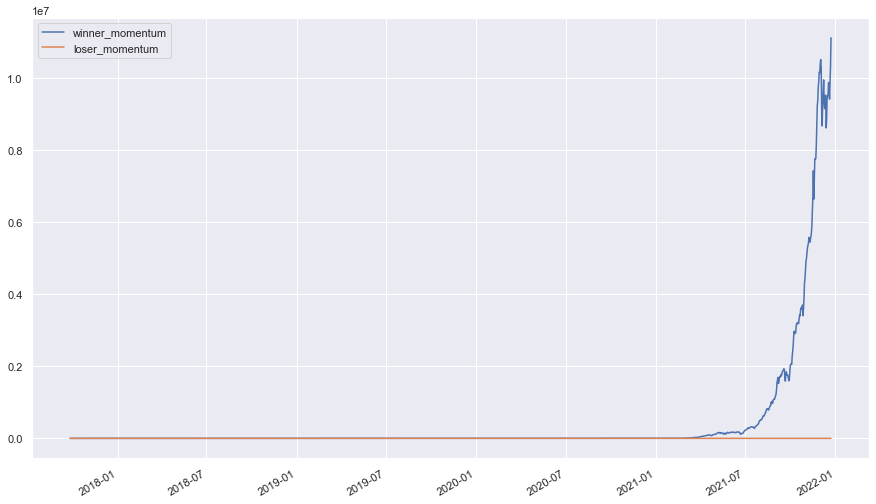

In [13]:
cum_rtn=portfolio[['winner_momentum','loser_momentum']]/100
(1+cum_rtn).cumprod().plot(figsize=(15,9))